In [1]:
import ROOT
import os, sys
import numpy as np
from array import array
from plugins.CMS_lumi import CMS_lumi

Welcome to JupyROOT 6.24/06


In [2]:
rdf_Zg = ROOT.RDataFrame("outTree", "./miniTree/2017/miniTree_ZGToLLG_2017.root").Define("testwei", "mcwei * puwei")
rdf_Sig = ROOT.RDataFrame("outTree", "../GENstudy/minitree/2017/Minitree_HDalitz_*_m125_*.root").Define("testwei", "mcwei * puwei")

In [3]:
def Draw1DHist(c, vh, vc, vcl , xaxis = "x-axis", yaxis = "x-axis", option = "hist", Log = True):
    ROOT.gPad.SetRightMargin(0.05)
    ROOT.gPad.SetTopMargin(0.07)
    ROOT.gPad.SetLeftMargin(0.14)
    ROOT.gPad.SetBottomMargin(0.15)
    if (Log == True):
        c.SetLogy()

    # Set the axis style
    if (Log == True):
        ymax = vh[0].GetBinContent(vh[0].GetMaximumBin()) * 10
        ymin = 1E-3
    else: 
        ymax = vh[0].GetBinContent(vh[0].GetMaximumBin()) * 1.5
        ymin = 0
    vh[0].SetMarkerStyle(20)
    vh[0].SetMarkerSize(1.2)
    vh[0].GetXaxis().SetTitle(xaxis)
    vh[0].GetXaxis().SetMoreLogLabels()
    # vh[0].GetXaxis().SetTickSize(0.02)
    vh[0].GetXaxis().SetTitleSize(0.05)
    vh[0].GetXaxis().SetLabelSize(0.045)
    vh[0].GetXaxis().SetLabelOffset(0.02)
    vh[0].GetXaxis().SetTitleOffset(1.4)
    vh[0].GetYaxis().SetTitle(yaxis)
    vh[0].GetYaxis().SetRangeUser(ymin, ymax)
    # vh[0].GetYaxis().SetNdivisions(506)
    # vh[0].GetYaxis().SetTickSize(0.02)
    vh[0].GetYaxis().SetTitleSize(0.05)
    vh[0].GetYaxis().SetLabelSize(0.045)
    # vh[0].GetYaxis().SetLabelOffset(0.02)
    vh[0].GetYaxis().SetTitleOffset(1.4)

    # Set the color style and draw option
    for i, h in enumerate(vh):
        h.SetLineColor(ROOT.TColor.GetColor(vcl[i]))
        h.SetLineWidth(3)
        if (vc[i] != None):
            h.SetFillColor(ROOT.TColor.GetColor(vc[i]))
        if (i == 0):
            h.Draw(option)
        else:
            h.Draw("%s same" %(option))

In [4]:
ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
ROOT.gStyle.SetOptStat(0)

In [26]:
rconv = 10
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])



sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2"
    # "abs(eleSCEta_lep1 - eleSCEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


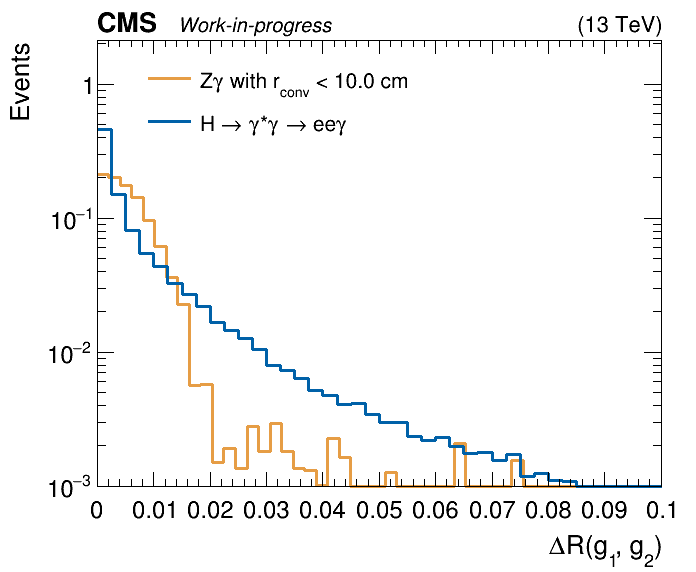

In [27]:
h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 49, 0, 0.1), "gsfDeltaR_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 40, 0, 0.1), "gsfDeltaR_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 700, 600)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "#DeltaR(g_{1}, g_{2})", yaxis = "Events", option = "hist", Log = True)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.55, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


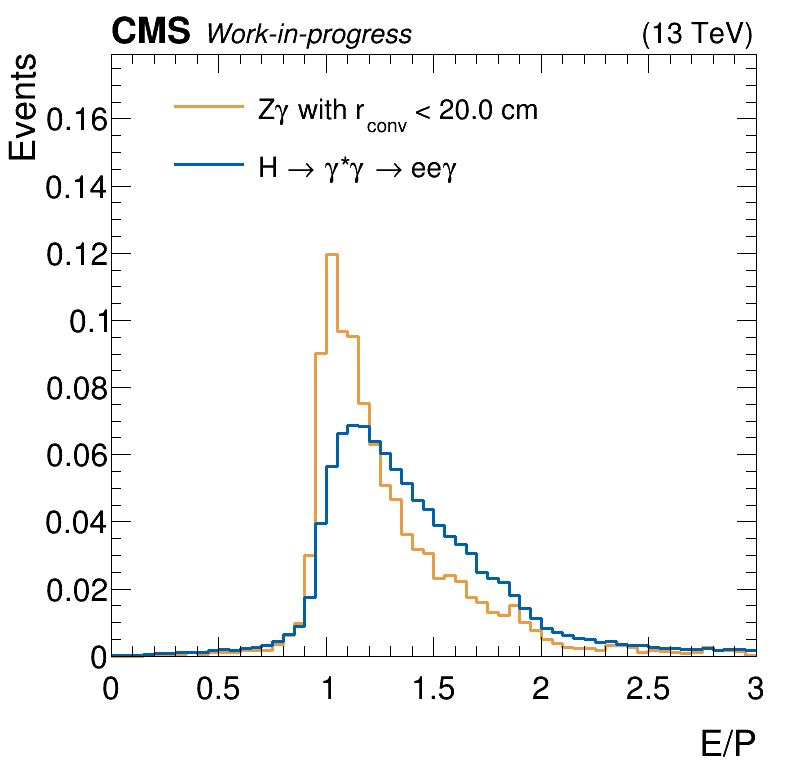

In [7]:
rconv = 20
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])



sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2"
    # "abs(eleSCEta_lep1 - eleSCEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"


h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 60, 0, 3), "eleEoverP_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 60, 0, 3), "eleEoverP_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "E/P", yaxis = "Events", option = "hist", Log = False)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.7, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


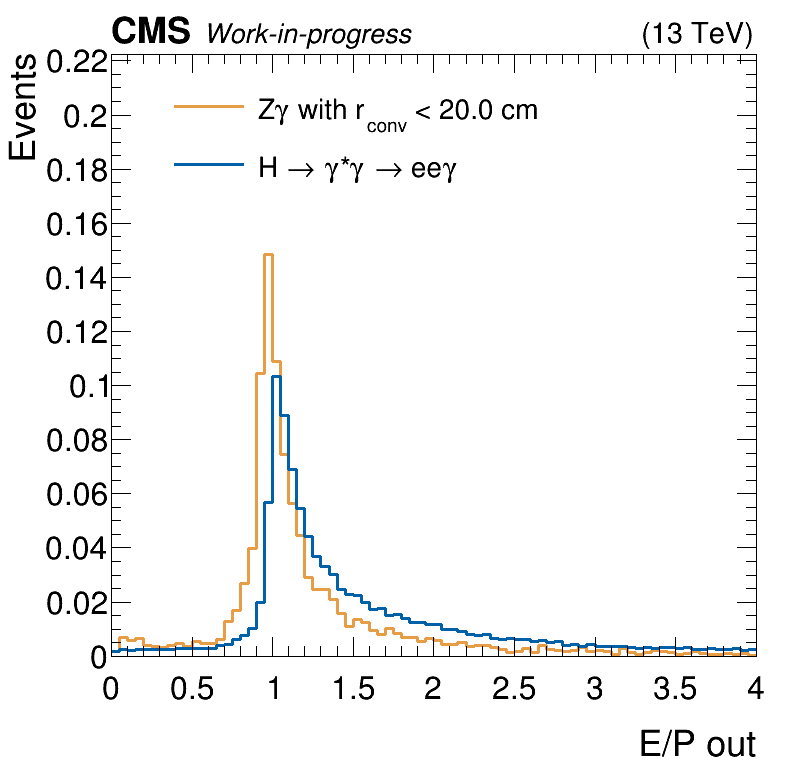

In [8]:
rconv = 20
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])


sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2"
    # "abs(eleSCEta_lep1 - eleSCEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"


h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 80, 0, 4), "eleEoverPout_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 80, 0, 4), "eleEoverPout_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "E/P out", yaxis = "Events", option = "hist", Log = False)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.7, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


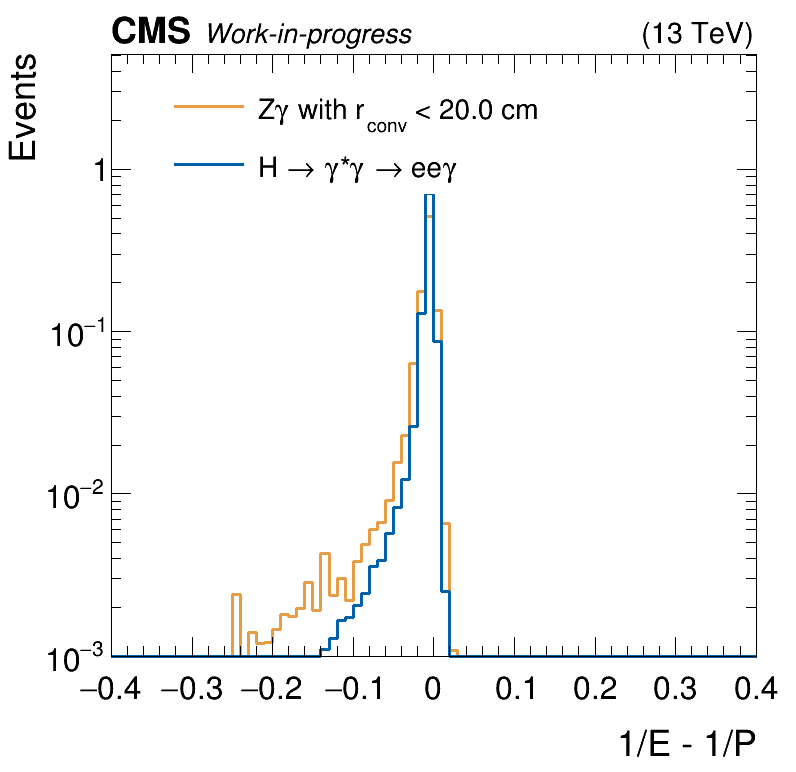

In [9]:
rconv = 20
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])


sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2"
    # "abs(eleSCEta_lep1 - eleSCEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"


h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 80, -0.4, 0.4), "eleEoverPInv_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 80, -0.4, 0.4), "eleEoverPInv_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "1/E - 1/P", yaxis = "Events", option = "hist", Log = True)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.7, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


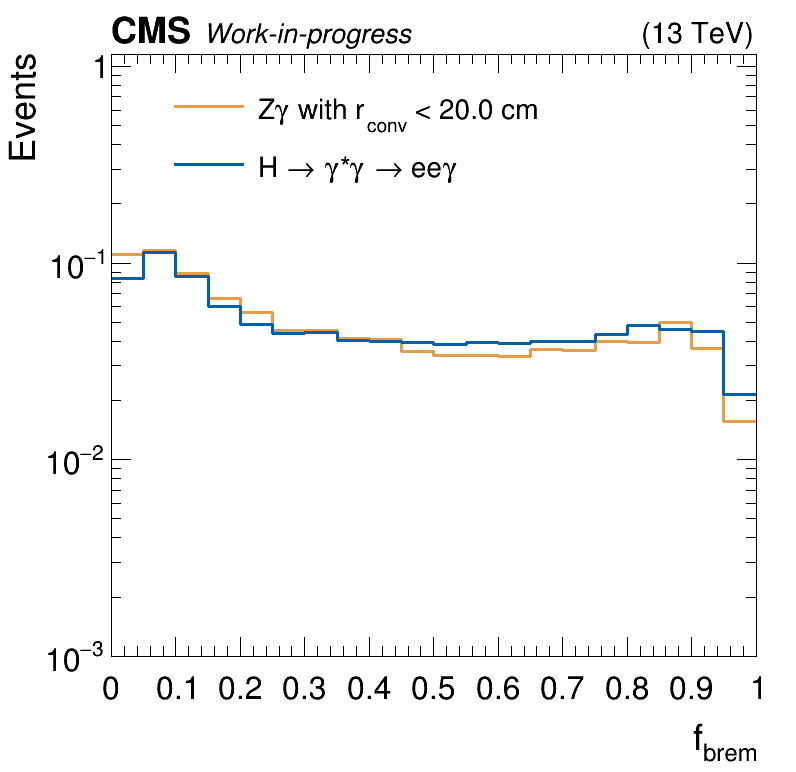

In [10]:
rconv = 20
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])


sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2"
    # "abs(eleSCEta_lep1 - eleSCEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"


h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 20, 0, 1), "eleBrem_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 20, 0, 1), "eleBrem_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "f_{brem}", yaxis = "Events", option = "hist", Log = True)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.7, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


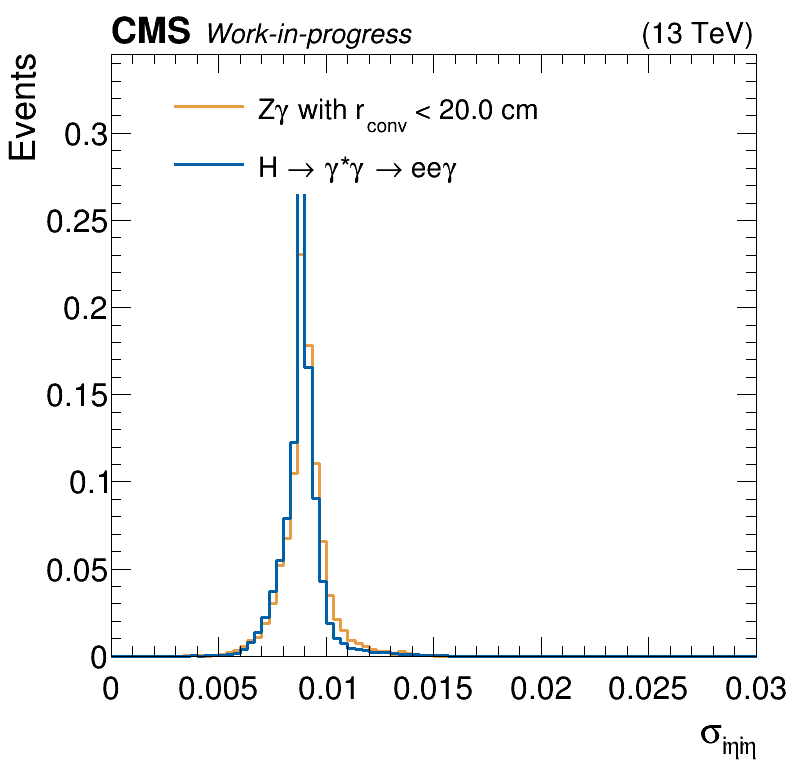

In [11]:
rconv = 20
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])


sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2"
    # "abs(eleSCEta_lep1 - eleSCEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"


h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 90, 0, 0.03), "eleSigmaIEtaIEtaFull5x5_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 90, 0, 0.03), "eleSigmaIEtaIEtaFull5x5_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "#sigma_{i#etai#eta}", yaxis = "Events", option = "hist", Log = False)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.7, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


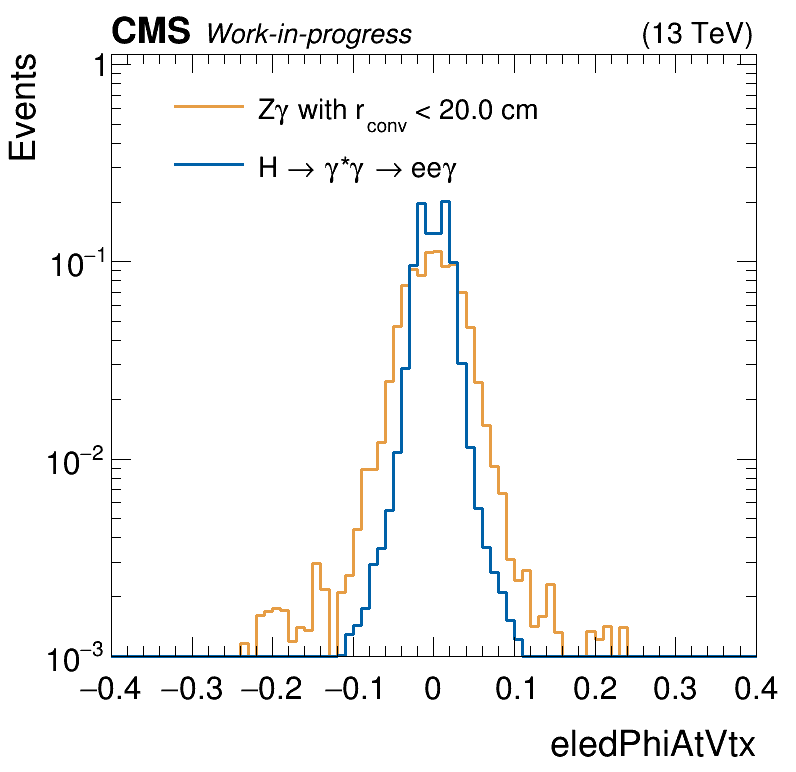

In [12]:
rconv = 20
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])


sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2"
    # "abs(eleSCEta_lep1 - eleSCEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"


h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 80, -0.4, 0.4), "eledPhiAtVtx_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 80, -0.4, 0.4), "eledPhiAtVtx_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "eledPhiAtVtx", yaxis = "Events", option = "hist", Log = True)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.7, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


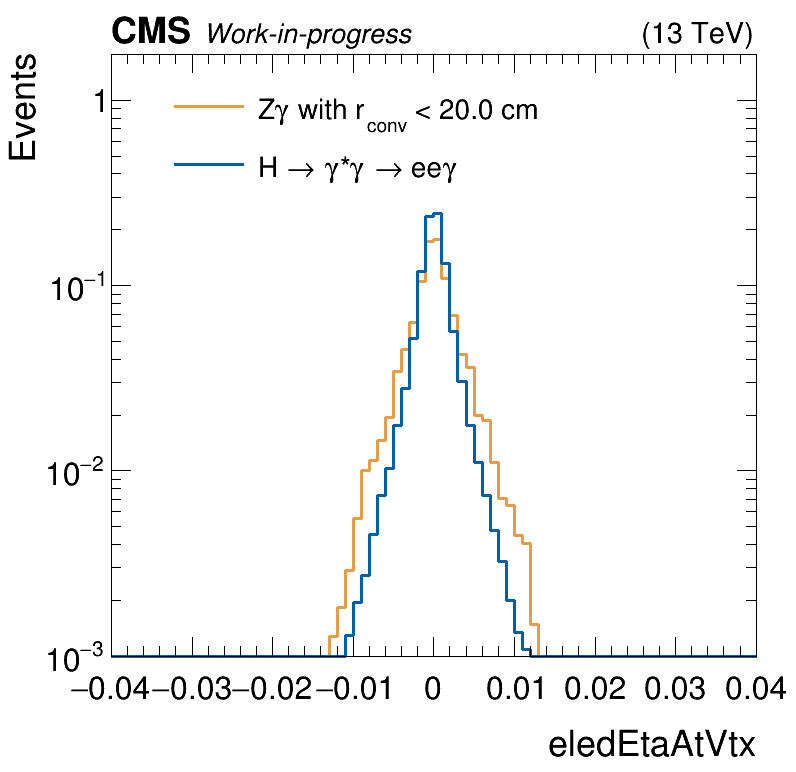

In [13]:
rconv = 20
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])


sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2"
    # "abs(eleSCEta_lep1 - eleSCEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"


h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 80, -0.04, 0.04), "eledEtaAtVtx_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 80, -0.04, 0.04), "eledEtaAtVtx_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "eledEtaAtVtx", yaxis = "Events", option = "hist", Log = True)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.7, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


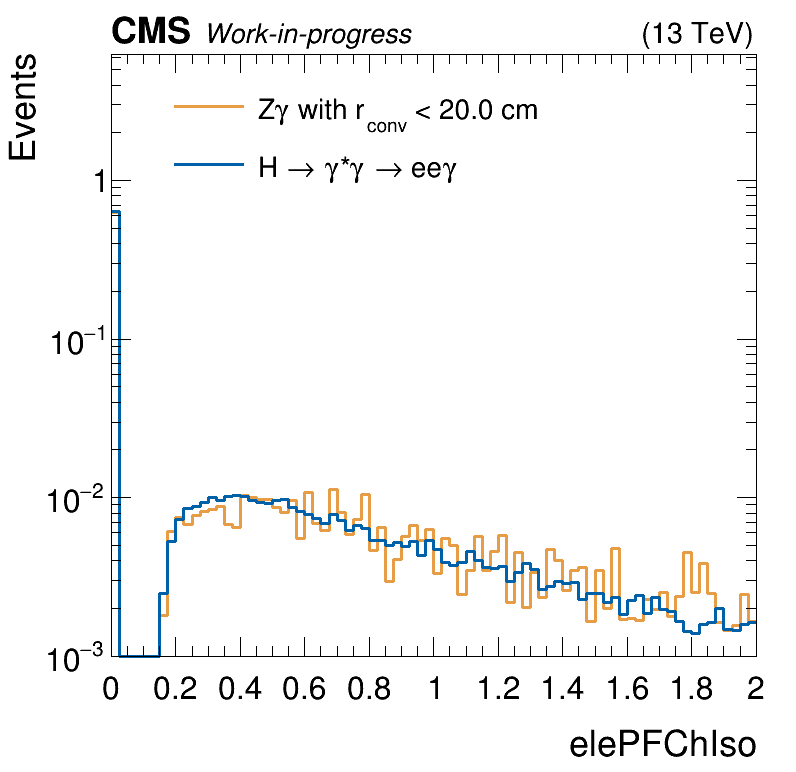

In [14]:
rconv = 20
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])


sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2"
    # "abs(eleSCEta_lep1 - eleSCEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"


h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 80, 0, 2), "elePFChIso_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 80, 0, 2), "elePFChIso_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "elePFChIso", yaxis = "Events", option = "hist", Log = True)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.7, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


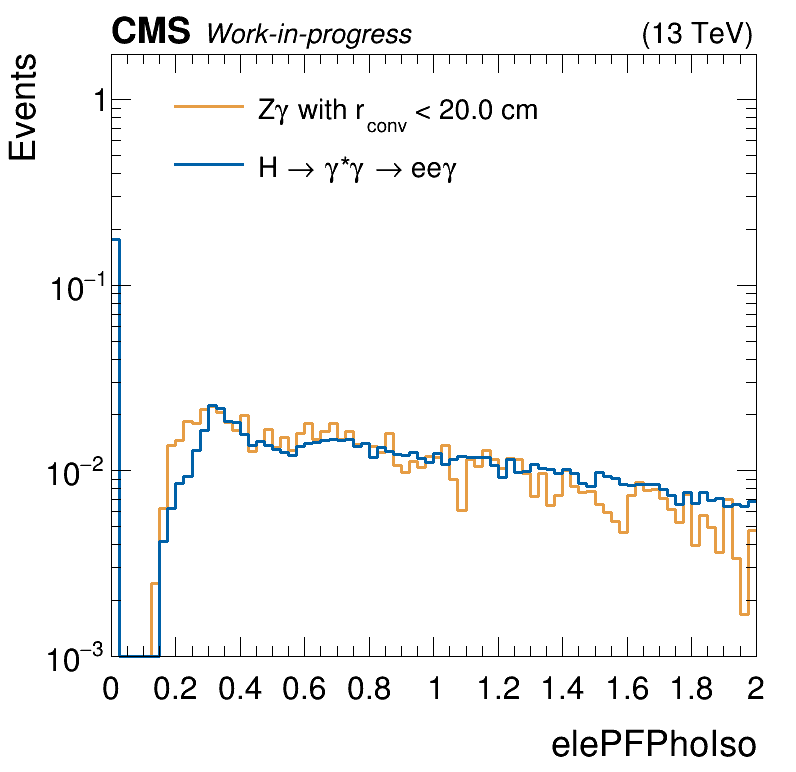

In [15]:
rconv = 20
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])


sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2"
    # "abs(eleSCEta_lep1 - eleSCEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"


h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 80, 0, 2), "elePFPhoIso_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 80, 0, 2), "elePFPhoIso_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "elePFPhoIso", yaxis = "Events", option = "hist", Log = True)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.7, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


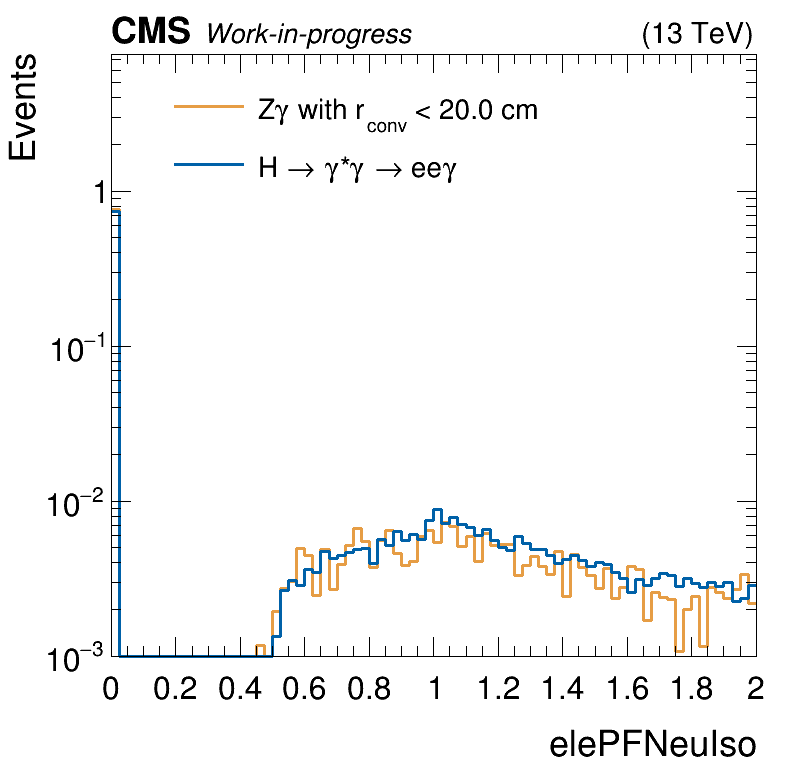

In [16]:
rconv = 20
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])


sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2"
    # "abs(eleSCEta_lep1 - eleSCEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"


h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 80, 0, 2), "elePFNeuIso_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 80, 0, 2), "elePFNeuIso_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "elePFNeuIso", yaxis = "Events", option = "hist", Log = True)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.7, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


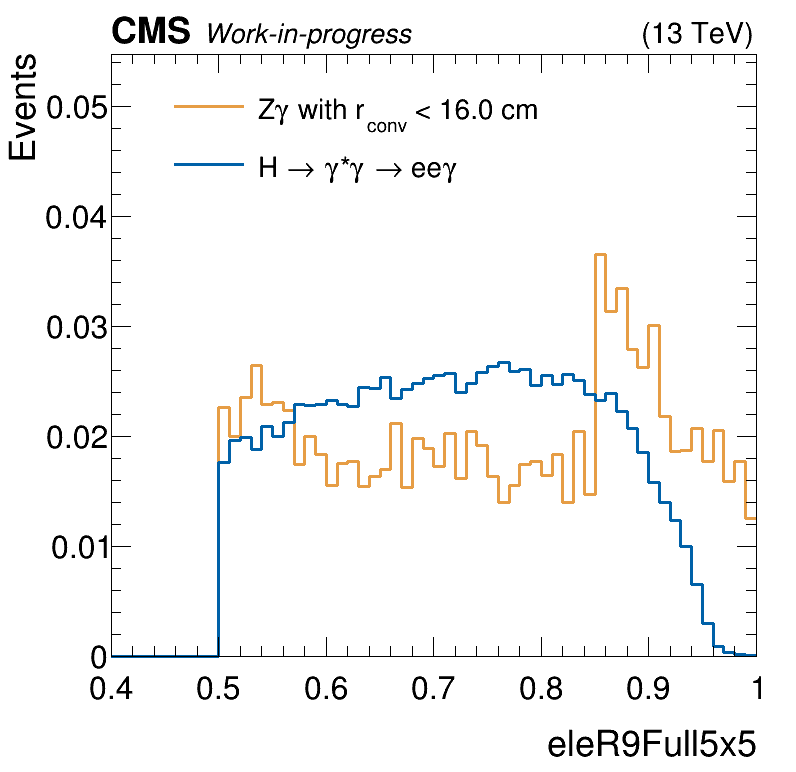

In [17]:
rconv = 16
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])


sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2",
    "abs(mcEta_lep1 - mcEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"


h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 60, 0.4, 1), "eleR9Full5x5_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 60, 0.4, 1), "eleR9Full5x5_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "eleR9Full5x5", yaxis = "Events", option = "hist", Log = False)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.7, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


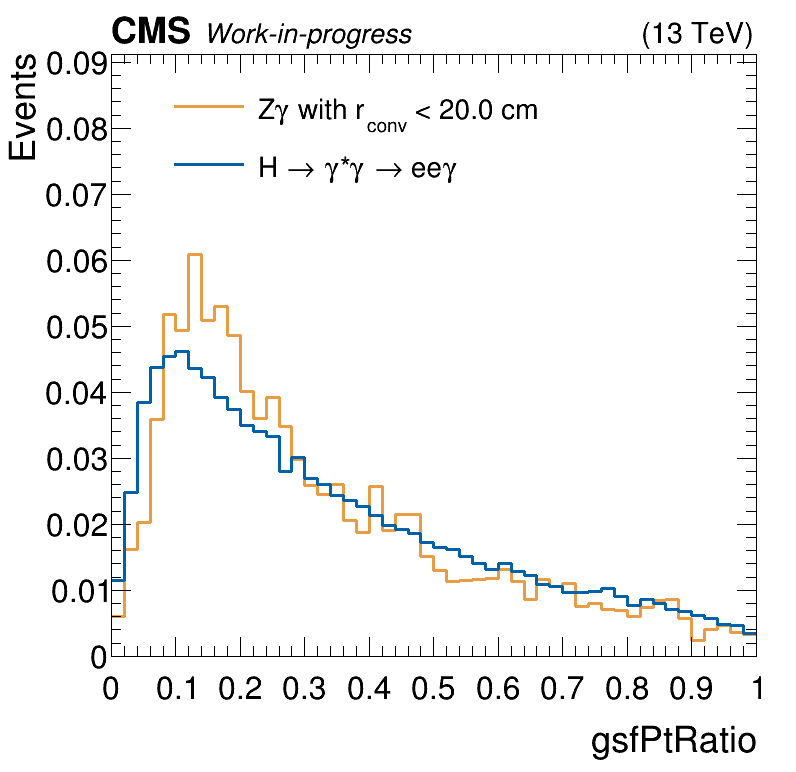

In [18]:
rconv = 20
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])


sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2",
    "abs(mcEta_lep1 - mcEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"


h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 50, 0, 1), "gsfPtRatio_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 50, 0, 1), "gsfPtRatio_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "gsfPtRatio", yaxis = "Events", option = "hist", Log = False)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.7, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


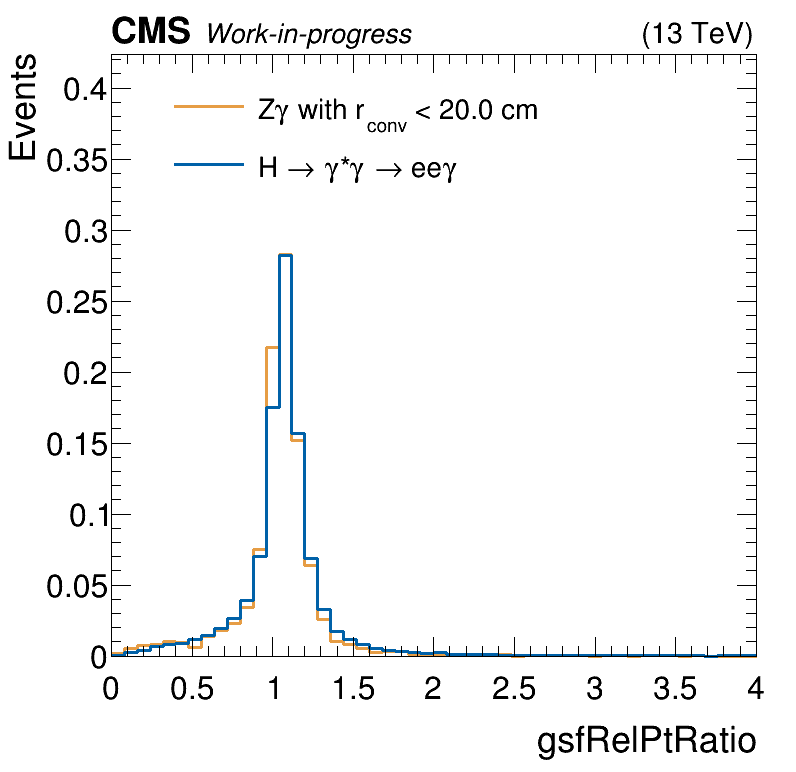

In [19]:
rconv = 20
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])


sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2",
    # "abs(eleSCEta_lep1 - eleSCEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"


h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 50, 0, 4), "gsfRelPtRatio_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 50, 0, 4), "gsfRelPtRatio_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "gsfRelPtRatio", yaxis = "Events", option = "hist", Log = False)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.7, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


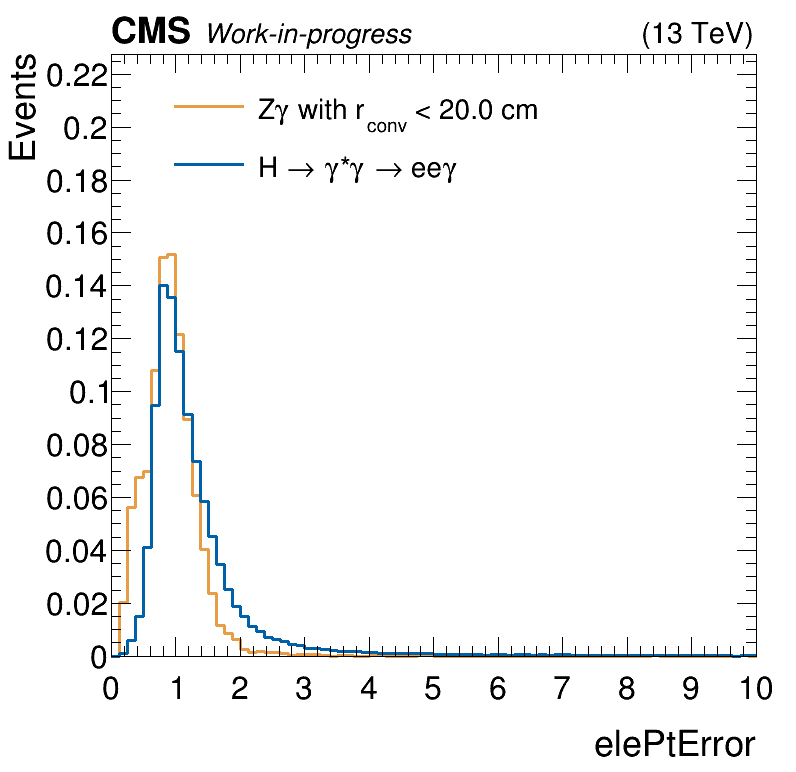

In [20]:
rconv = 20
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])


sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2",
    # "abs(eleSCEta_lep1 - eleSCEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"


h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 80, 0, 10), "elePtError_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 80, 0, 10), "elePtError_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "elePtError", yaxis = "Events", option = "hist", Log = False)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.7, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


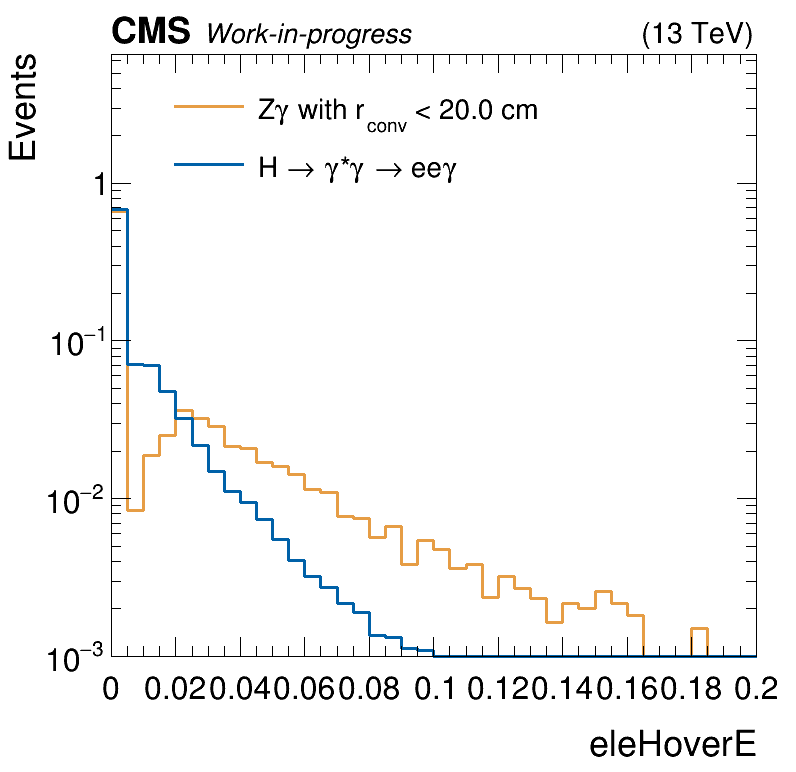

In [21]:
rconv = 20
sel_den = "&&".join([
    "convVtxRadius_lep1 < {}".format(rconv),
    "isHggPho_lep1 == 1",
    "isEBPho_lep1 == 1"
])


sel_den_Sig = "&&".join([
    # "convVtxRadius_lep1 < 30", 
    "elePresel_lep1 == 1",
    "abs(eleSCEta_lep1) < 1.4442",
    "category == 2",
    # "abs(eleSCEta_lep1 - eleSCEta_lep2) < 0.003"
])
sel_num_Sig = sel_den + "&& eleClass_lep1 == 0"


h1 = rdf_Zg.Filter(sel_den).Histo1D(("h1", " ", 40, 0, 0.2), "eleHoverE_lep1", "testwei")
h1.Scale(1./h1.Integral())
h2 = rdf_Sig.Filter(sel_den_Sig).Histo1D(("h2", " ", 40, 0, 0.2), "eleHoverE_lep1", "testwei")
h2.Scale(1./h2.Integral())

c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

Draw1DHist(c1, [h1, h2], [None, None], ["#E69D45", "#0061a8"], xaxis = "eleHoverE", yaxis = "Events", option = "hist", Log = True)
CMS_lumi(c1, 5, 0, "", 2017, True, "Work-in-progress", "", "")

leg = ROOT.TLegend(0.2, 0.75, 0.7, 0.9)
leg.SetTextSize(0.04)
leg.AddEntry(h1.GetPtr(), "Z#gamma with r_{conv} < %.1f cm" %rconv, "l")
leg.AddEntry(h2.GetPtr(), "H #rightarrow #gamma*#gamma #rightarrow ee#gamma", "l")
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.Draw()

c1.Draw()
c1.RedrawAxis()